In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("dataset/train_data.csv")
test = pd.read_csv("dataset/test_data.csv")

In [3]:
train.head()


,Unnamed: 0,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,3,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,12.247694
1,1,2,20,3,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,12.109011
2,2,3,60,3,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,12.317167
3,3,4,70,3,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,11.849398
4,4,5,60,3,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,12.429216


In [4]:
train.shape


(1200, 72)

In [5]:
train = train.drop(["Unnamed: 0", "Id"], axis=1)
test = test.drop(["Unnamed: 0", "Id"], axis=1)

In [6]:
train_data =train.values
Y = train_data[:,-1].reshape(train_data.shape[0],1)
X = train_data[:,:-1]

In [7]:
test_data = test.values
X_test = test_data[:,:-1]
Y_test = test_data[:,-1].reshape(test_data.shape[0],1)

![Linear Regression](LR.png)

![Linear Regression](formula.webp)

![Linear Regression](gradient.png)

In [8]:
X = np.vstack((np.ones((X.shape[0],)),X.T)).T
X_test = np.vstack((np.ones((X_test.shape[0],)),X_test.T)).T

In [9]:
print("X_train shape:\t",X.shape)
print("Y_train shape:\t",Y.shape)
print("X_test shape:\t",X_test.shape)
print("Y_test shape:\t",Y_test.shape)


X_train shape:	 (1200, 70)
Y_train shape:	 (1200, 1)
X_test shape:	 (258, 70)
Y_test shape:	 (258, 1)


In [10]:
def model (X,Y, learning_rate, iterations):
    m = X.shape[0]
    n = X.shape[1]
    theta = np.zeros((n,1))
    
    cost_list = []
    
    for i in range(iterations):
        
        y_pred = X @ theta
        
        cost = (1/(2*m)) * np.sum(np.square(y_pred - Y))
        
        d_theta = (1/m) * (X.T @ (y_pred - Y))
        theta = theta - learning_rate * d_theta
        
        cost_list.append(cost)
        
        if (i%(iterations/10) == 0):
            print(f"Iteration {i}: Cost {cost}")
    return theta, cost_list
        

In [11]:
iterations = 10000
learning_rate = 0.000000005
theta, cost_list = model(X,Y, learning_rate, iterations)

Iteration 0: Cost 72.37539364066856
Iteration 1000: Cost 0.027904168310316908
Iteration 2000: Cost 0.017251065372144162
Iteration 3000: Cost 0.016355272705548287
Iteration 4000: Cost 0.016158836087530753
Iteration 5000: Cost 0.016040958498450605
Iteration 6000: Cost 0.01594682732375342
Iteration 7000: Cost 0.015867896317230047
Iteration 8000: Cost 0.01580056801478536
Iteration 9000: Cost 0.015742355306482884


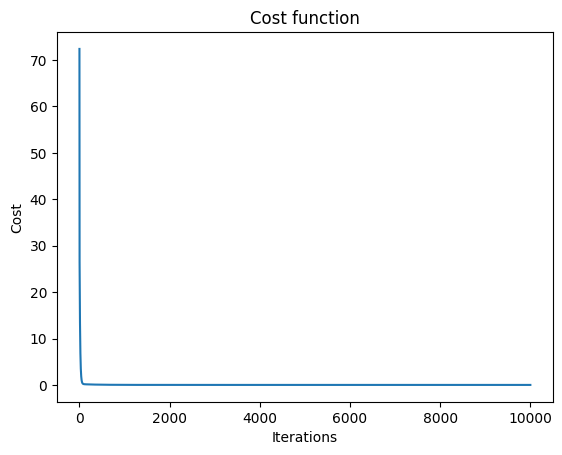

In [12]:
plt.plot(cost_list)
plt.title("Cost function")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

Test error is : 13.0 %
Test accuracy is : 87.0 %


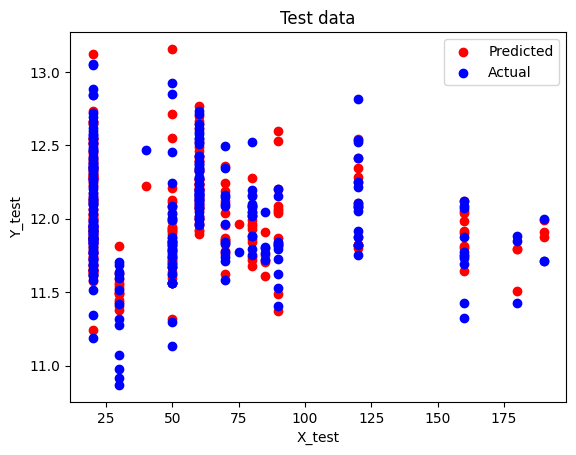

In [13]:
m = X_test.shape[0]
y_pred = X_test @ theta
error =(1/(m)) * np.sum(np.abs(y_pred - Y_test))
print(f"Test error is :", round(error, 2)*100, "%")
print(f"Test accuracy is :", round(1-(error), 2)*100, "%")

plt.scatter(X_test[:,1], y_pred, color='red', label='Predicted')
plt.scatter(X_test[:,1], Y_test, color='blue', label='Actual')
plt.title("Test data")
plt.xlabel("X_test")
plt.ylabel("Y_test")
plt.legend()
plt.show()

